In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("student_data.csv")

In [9]:
# null data , missing value
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [105]:
data.head(12)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [106]:
pop = data.G1
pop

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64

In [107]:
len(pop)

395

In [108]:
mean_pop = pop.mean()
mean_pop

np.float64(10.90886075949367)

In [109]:
# Sample Size Calculator
# Sample size: 457
# Random choice 
sample_size = 212
sample = np.random.choice(pop, size = sample_size)
sample.mean()

np.float64(10.858490566037736)

In [110]:
sample_mean_list =[]
for i in range(1000000):
  sample = np.random.choice(pop, size = sample_size)
  sample_mean = sample.mean()
  sample_mean_list.append(sample_mean)

In [111]:
sample_mean_list = np.array(sample_mean_list)

In [112]:
sample_mean_max = sample_mean_list.max()
sample_mean_max

np.float64(12.122641509433961)

In [113]:
sample_mean_min = sample_mean_list.min()
sample_mean_min

np.float64(9.778301886792454)

In [114]:
mean_pop * 1.1

np.float64(11.99974683544304)

In [115]:
mean_pop * .9

np.float64(9.817974683544303)

In [116]:
mean_pop

np.float64(10.90886075949367)

In [117]:
len(sample_mean_list[sample_mean_list >= mean_pop * 1.1])

1

In [118]:
len(sample_mean_list[sample_mean_list <= mean_pop * .9])

1

In [119]:
outOfRange = len(sample_mean_list[sample_mean_list >= mean_pop * 1.1]) + len(sample_mean_list[sample_mean_list <= mean_pop * .9])

In [120]:
P_value = (outOfRange/1000000) * 100
P_value
# thershold = 5 percent

0.00019999999999999998

# AB TEST

In [135]:
B =np.random.normal(7.3, 0, size=50000)

In [125]:
def z_test(B, pop_mean, pop_std):
    sample_n = B.size
    sample_mean = B.mean()

    z_score = (sample_mean-pop_mean)/(pop_std/np.sqrt(sample_n))
    return z_score



In [ ]:
z_test(B,pop_mean=6.8,pop_std=1)

np.float64(111.80339887498927)

# Correlation Coefficient

In [137]:
G1 = data.G1
G2 = data.G2
G3 = data.G3


In [138]:
s1 = np.array([6,9,7,9,5,5])
s2 = np.array([7,8,9,9,8,7])

In [142]:
np.corrcoef(s1,s2)

array([[1.        , 0.60933335],
       [0.60933335, 1.        ]])

In [140]:
corr = np.corrcoef(s1,s2)[0][1]

In [141]:
corr

np.float64(0.6093333477767906)

In [143]:
Tscore = (corr * np.sqrt(len(s1) - 2 )) / (np.sqrt(1-(corr**2)))

In [144]:
Tscore

np.float64(1.5369465587356796)

In [145]:
from scipy.stats import pearsonr
pearsonr(s1,s2)

PearsonRResult(statistic=np.float64(0.6093333477767906), pvalue=np.float64(0.1991187928973371))

In [147]:
pr_g12 = pearsonr(G1, G2)

In [148]:
pr_g12[1] > .05

np.False_

In [149]:
pr_g32 = pearsonr(G3, G2)

In [150]:
pr_g32[1] > .05

np.False_

In [158]:
age = data.age
G = G1 + G2 + G3

In [169]:
pr_age_grade = pearsonr(age, G1)
pr_age_grade

PearsonRResult(statistic=np.float64(-0.06408149744707387), pvalue=np.float64(0.203776732136809))

In [167]:
pr_age_grade[1] > .05


np.True_

In [168]:
float(pr_age_grade[1] )

0.203776732136809

# U_Test

In [151]:
from scipy import stats

In [152]:
sample1 = np.array([51, 56, 48, 78, 59, 63, 81, 45, 65, 34, 49, 54])
sample2 = np.array([63, 46, 49, 89, 76, 34, 51, 45, 89, 67, 88, 57])

In [153]:
sample1.mean() , sample2.mean()

(np.float64(56.916666666666664), np.float64(62.833333333333336))

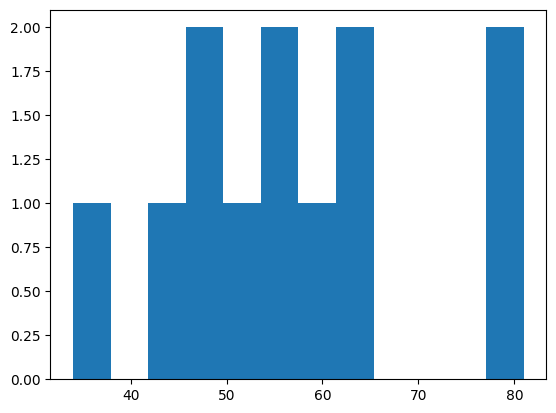

In [155]:
plt.hist(sample1, bins = 12)
plt.show()

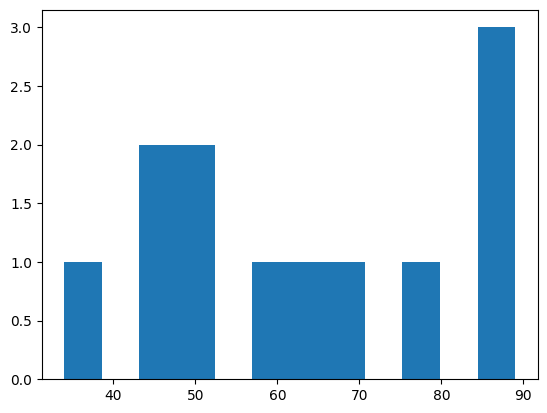

In [156]:
plt.hist(sample2, bins=12)
plt.show()

In [157]:
stats.mannwhitneyu(sample1, sample2)

MannwhitneyuResult(statistic=np.float64(60.5), pvalue=np.float64(0.5248316346644181))